In [29]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar100
from keras import models

from keras.layers import Dense
from keras.models import Sequential

In [30]:
(train_images, train_labels),(test_images, test_labels) = cifar100.load_data()


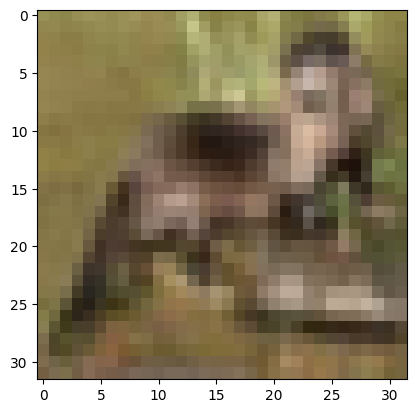

So nay la: [55]


In [31]:
hinh = train_images[100]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print('So nay la:',train_labels[100])

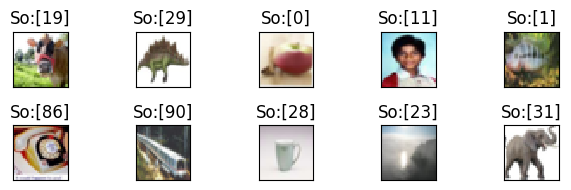

In [32]:
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray',interpolation = 'none')
  plt.title('So:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [35]:
model = Sequential()

model.add(Dense(512, activation = 'relu',input_shape = (32*32*3,))) 

model.add(Dense(100,activation = 'softmax'))

model.summary()
     

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               1573376   
                                                                 
 dense_9 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,624,676
Trainable params: 1,624,676
Non-trainable params: 0
_________________________________________________________________


In [36]:
train_images = train_images.reshape((50000, 32*32*3))
train_images = train_images.astype('float32')/255
     

test_images = test_images.reshape((10000,32*32*3))
test_image = test_images.astype('float32')/255

In [37]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels, 100) 
test_labels = to_categorical(test_labels, 100)

In [38]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs= 10, batch_size= 128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Hàm mất mát trong tệp kiểm tra (Test loss:)',test_loss)
print('Test accuracy :',test_acc)

Epoch 1/10
391/391 [==============================] - 12s 29ms/step - loss: 4.6027 - accuracy: 0.0145
Epoch 2/10
391/391 [==============================] - 11s 29ms/step - loss: 4.5765 - accuracy: 0.0275
Epoch 3/10
391/391 [==============================] - 11s 29ms/step - loss: 4.4878 - accuracy: 0.0435
Epoch 4/10
391/391 [==============================] - 11s 29ms/step - loss: 4.3567 - accuracy: 0.0558
Epoch 5/10
391/391 [==============================] - 11s 29ms/step - loss: 4.2307 - accuracy: 0.0678
Epoch 6/10
391/391 [==============================] - 11s 29ms/step - loss: 4.1424 - accuracy: 0.0741
Epoch 7/10
391/391 [==============================] - 11s 28ms/step - loss: 4.0856 - accuracy: 0.0809
Epoch 8/10
391/391 [==============================] - 12s 32ms/step - loss: 4.0479 - accuracy: 0.0853
Epoch 9/10
391/391 [==============================] - 11s 27ms/step - loss: 4.0206 - accuracy: 0.0888
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 186137.

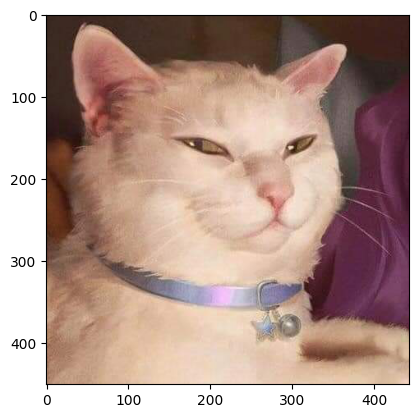

In [39]:
from keras.utils import load_img
img = load_img('aaaa.jpg')
plt.imshow(img)

In [40]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

img = load_img('aaaa.jpg',target_size=(32,32))
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)
print(np.argmax(model.predict(img),axis=-1))

1/1 [==============================] - 0s 21ms/step
[61]
